# Polynomial Regression

In [41]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

## Generate sample data

We'll generate data that follows a quadratic relationship y=3x^2+2x+1+outliers(with some added noise).

In [42]:
# Generate sample data
np.random.seed(42)
X = np.random.uniform(-6, 6, 100)  # Independent variable
y = 3 * X**2 + 2 * X + 1 + np.random.normal(0, 10, 100)  # Dependent variable with added noise


In [18]:
# Reshape X for sklearn (single feature)
X = X.reshape(-1, 1)

In [71]:
y

array([  5.65919206,  96.5850126 ,  30.73621603, -12.30301504,
        41.6633404 ,  47.43777486,  89.53826768,  62.53023224,
        -0.24130165,  19.67926481,  97.93859515, 110.95754383,
        51.42484461,  34.97628908,  38.06824655,  46.38868643,
         5.83599785,  -1.41770255,  -2.55360151,   0.18318735,
        12.05045451,  51.10314563,  14.72666809,   3.1619687 ,
       -13.3743342 ,  38.77031195,  29.32962724,  -6.59361466,
         5.29456803,  83.02084102,  27.43940217,  41.73383762,
        74.86255258,  98.07602718,  86.65075482,  49.22345291,
        13.40496917,  85.90341029,  18.16084407,   4.12643804,
        53.29520138, -10.79248526,  94.90858194,  90.72167873,
        28.25786505,   7.21728921,  25.82458349, -12.36290071,
         8.93217693,  58.24588373,  97.62486799,  34.64177692,
        95.98931433,  72.7849909 ,  -8.01657149,  88.6970513 ,
        53.65498073,  38.36772642,  70.23668309,  25.48737312,
        -4.15061177,  14.8772682 ,  63.71039956,  -5.88

Text(0.5, 1.0, 'Data having Non-Linear Relationship')

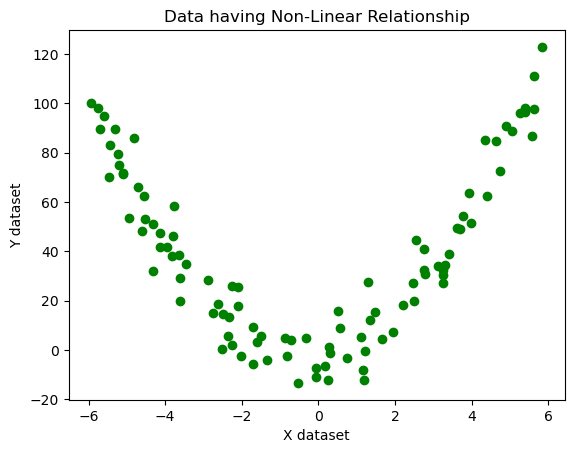

In [47]:
# Visualize the data
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.title('Data having Non-Linear Relationship')

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Apply Simple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [24]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,linear_regression.predict(X_test))
print(score)

-0.07457145717596902


Text(0, 0.5, 'Y')

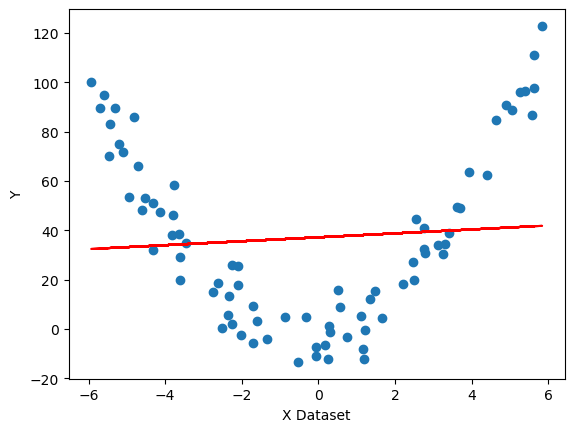

In [26]:
## Lets visualize this model
plt.plot(X_train,linear_regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

## Apply polynomial transformation

### Create a polynomial feature transformation with degree=2

In [48]:
# Create a polynomial feature transformation (degree=2 for quadratic)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [28]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [50]:
X_poly_train

array([[ 1.00000000e+00,  5.06249082e+00,  2.56288133e+01],
       [ 1.00000000e+00,  4.64655291e+00,  2.15904540e+01],
       [ 1.00000000e+00, -3.60391461e+00,  1.29882005e+01],
       [ 1.00000000e+00, -5.58733775e+00,  3.12183431e+01],
       [ 1.00000000e+00,  5.84264324e+00,  3.41364800e+01],
       [ 1.00000000e+00, -3.79914588e+00,  1.44335094e+01],
       [ 1.00000000e+00, -4.53554118e+00,  2.05711338e+01],
       [ 1.00000000e+00,  2.72793953e-01,  7.44165406e-02],
       [ 1.00000000e+00,  2.49687093e+00,  6.23436446e+00],
       [ 1.00000000e+00, -5.93373459e+00,  3.52092062e+01],
       [ 1.00000000e+00,  5.63891823e+00,  3.17973988e+01],
       [ 1.00000000e+00,  2.40816254e-01,  5.79924683e-02],
       [ 1.00000000e+00, -2.09780014e+00,  4.40076541e+00],
       [ 1.00000000e+00,  1.10897483e+00,  1.22982517e+00],
       [ 1.00000000e+00,  7.35326371e-01,  5.40704872e-01],
       [ 1.00000000e+00, -4.12806576e+00,  1.70409269e+01],
       [ 1.00000000e+00, -4.30890930e+00

In [51]:
# Create and train a linear regression model on the transformed data
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

#### Prediction and Evaluation: 
We predict the values of Y based on the transformed features and evaluate the model.

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_poly_test)

In [53]:
# Model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 63.584060728208115
R-squared: 0.9339418853238094


In [ ]:
# Coefficient 
model.coef_

array([0.        , 1.71425253, 3.16815559])

We have 3 coeffiecients

In [37]:
model.intercept_

-1.6374180805480307

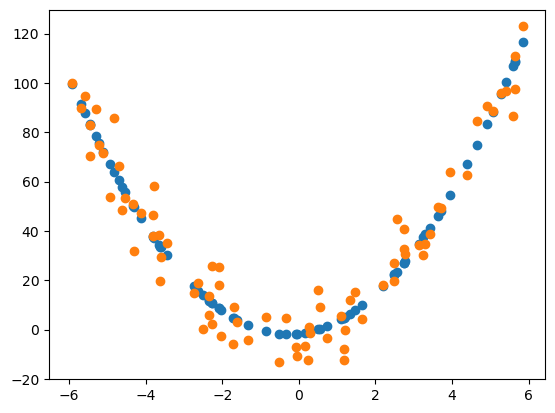

In [58]:
plt.scatter(X_train,model.predict(X_poly_train))
plt.scatter(X_train, y_train)

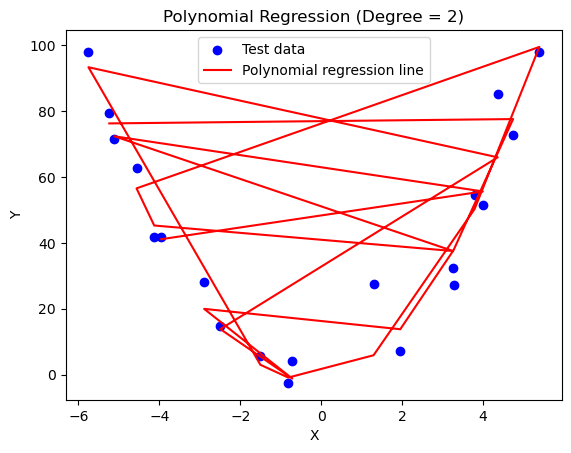

In [59]:
# Plot the original data and the regression line
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Polynomial regression line')
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Create a polynomial feature transformation with degree=3

In [62]:
# Create a polynomial feature transformation (degree=3 for quadratic)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=True)

X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [63]:
X_poly_train

array([[ 1.00000000e+00,  5.06249082e+00,  2.56288133e+01,
         1.29745632e+02],
       [ 1.00000000e+00,  4.64655291e+00,  2.15904540e+01,
         1.00321187e+02],
       [ 1.00000000e+00, -3.60391461e+00,  1.29882005e+01,
        -4.68083658e+01],
       [ 1.00000000e+00, -5.58733775e+00,  3.12183431e+01,
        -1.74427427e+02],
       [ 1.00000000e+00,  5.84264324e+00,  3.41364800e+01,
         1.99447274e+02],
       [ 1.00000000e+00, -3.79914588e+00,  1.44335094e+01,
        -5.48350079e+01],
       [ 1.00000000e+00, -4.53554118e+00,  2.05711338e+01,
        -9.33012246e+01],
       [ 1.00000000e+00,  2.72793953e-01,  7.44165406e-02,
         2.03003822e-02],
       [ 1.00000000e+00,  2.49687093e+00,  6.23436446e+00,
         1.55664034e+01],
       [ 1.00000000e+00, -5.93373459e+00,  3.52092062e+01,
        -2.08922085e+02],
       [ 1.00000000e+00,  5.63891823e+00,  3.17973988e+01,
         1.79302931e+02],
       [ 1.00000000e+00,  2.40816254e-01,  5.79924683e-02,
      

In [64]:
# Create and train a linear regression model on the transformed data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_poly_test)

# Model performance
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 64.20493386494
R-squared: 0.9332968540314401


Here slight change in accurace from 0.9339418853238094 (degree 2) to 0.9332968540314401 (degree 3)

## Prediction of the new data set

In [65]:
X_new = np.linspace(-3,3,200).reshape(200,1)

In [68]:
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

Here polynomial degree is 3, so here we see 4 feautes (with one bias)

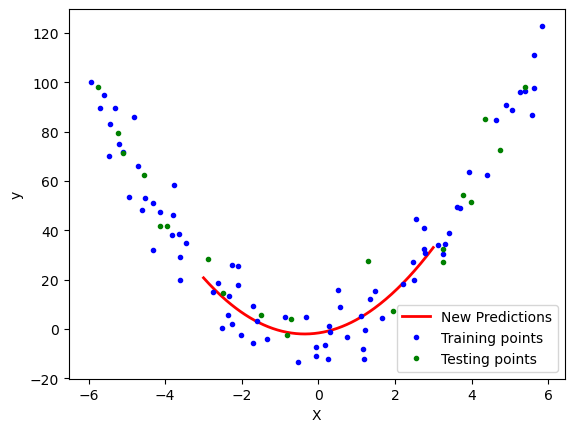

In [70]:
y_new = model.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()